# Stats analysis of chapter 2

Looking at Fluctuating Asymmetry (FA) as a function of distance to range edge and forest cover

### Load packages

In [4]:
library(brms) # for Bayesian analysis
library(tidyverse) # for tidy code
library(egg) # for nice professional figures
library(lme4) # for frequentist analysis
library(lmerTest) # for p-values
library(GGally) # for ggpairs
library(tidybayes) # for plotting bayes models

library(magrittr)
library(modelr)
library(ggdist)
library(cowplot)
library(rstan)
library(ggrepel)
library(RColorBrewer)
library(posterior)

Loading required package: Rcpp

Loading 'brms' package (version 2.16.1). Useful instructions
can be found by typing help('brms'). A more detailed introduction
to the package is available through vignette('brms_overview').


Attaching package: ‘brms’


The following object is masked from ‘package:stats’:

    ar


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: gridExtra


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



Attaching p

In [5]:
getwd()

[1] "/Users/tom/OneDrive - Imperial College London/1.PHD/2.R-dir/2.chapter/2.notebook"

### Load forest cover data

In [6]:
FC <- read_csv("../2.data_cleaned/FC_calculated.csv", 
               col_types = cols(
                  species = col_character(),  # load column as character
                  bird_id = col_character()
                    )) %>% dplyr::select(-"X0")

In [7]:
# head(FC)

#### Make sure that all NAs in column percentage of FC are zeros
The function used to calculate FC in the previous script would give NAs if the landscape metric 'proportion of class' (3 for FC in MAPBIOMAS) was innexistent. That means that forest cover was innexistent, therefore NA = 0%. That happened often for smaller buffer radius like 100 m.  

In [8]:
FC$FC_percentage.value[is.na(FC$FC_percentage.value)] <- 0

### Load distance to range edge data

In [9]:
dist <- read_csv("../2.data_cleaned/NHM-MZUSP_dist2edge_data.csv")%>%
  dplyr::select(-c(13:14)) %>%  # remove unnecessary columns
  dplyr::select(-c("feather_tail", "distance", "sex")) %>% # remove some more unnecessary columns
  filter(inrange == TRUE) # keep only specimens inside the range


── Column specification ────────────────────────────────────────────────────────
cols(
  species = col_character(),
  subspecies = col_character(),
  date_collected = col_double(),
  bird_id = col_character(),
  lon_dd = col_double(),
  lat_dd = col_double(),
  location = col_character(),
  sex = col_character(),
  feather_tail = col_character(),
  source = col_character(),
  distance = col_double(),
  inrange = col_logical(),
  in_costal_margin = col_logical(),
  distance_sgn = col_double(),
  dist_km = col_double()
)




In [10]:
 head(dist)

species,subspecies,date_collected,bird_id,lon_dd,lat_dd,location,source,inrange,dist_km
<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<lgl>,<dbl>
Automolus_leucophthalmus,Automolus_leucophthalmus_leucophthalmus,2016,104089,-48.85236,-27.81322,"Aguas Mornas, SC, Brasil",MZUSP,TRUE,573.7955
Automolus_leucophthalmus,Automolus_leucophthalmus_sulphuracens,2010,91247,-49.80011,-28.70533,"Morro Grande, Nova Roma, Pousada Rancho Fundo, SC, Brasil",MZUSP,TRUE,438.8556
Automolus_leucophthalmus,Automolus_leucophthalmus_sulphuracens,2010,91248,-48.23111,-25.20336,"Guaraqueçaba, Utinga, PR, Brasil",MZUSP,TRUE,737.7786
Automolus_leucophthalmus,Automolus_leucophthalmus_sulphuracens,2002,75697,-49.80359,-23.87488,"Wenceslau Bras, PR, Brasil",MZUSP,TRUE,521.2166
Automolus_leucophthalmus,Automolus_leucophthalmus_sulphuracens,2002,75631,-50.00111,-23.93333,"Fazenda Chapadão, Pinhalão, PR, Brasil",MZUSP,TRUE,512.9594
Automolus_leucophthalmus,Automolus_leucophthalmus_sulphuracens,2012,93205,-45.88944,-23.65417,"Estacao Biologica de Boraceia, Salesópolis, SP, Brasil",MZUSP,TRUE,689.6465


### Load FA data

In [11]:
# load fluctuating asymmetry data
FA <-read_csv("../2.data_cleaned/fa/NHM-MZUSP_fa_wing_tarsus.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  species = col_character(),
  subspecies = col_character(),
  date_collected = col_double(),
  bird_id = col_character(),
  lon_dd = col_double(),
  lat_dd = col_double(),
  sex = col_character(),
  source = col_character(),
  type = col_character(),
  unit = col_character(),
  mean_l = col_double(),
  mean_r = col_double(),
  sd_l = col_double(),
  sd_r = col_double(),
  fa_left_right = col_double(),
  fa_ratio = col_double(),
  fa_abs_mm = col_double()
)




In [12]:
head(FA)

species,subspecies,date_collected,bird_id,lon_dd,lat_dd,sex,source,type,unit,mean_l,mean_r,sd_l,sd_r,fa_left_right,fa_ratio,fa_abs_mm
<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Automolus_leucophthalmus,Automolus_leucophthalmus_leucophthalmus,2016,104089,-48.85236,-27.81322,female,MZUSP,w,mm,88.50000,87.84000,0.05000000,0.08717798,0.6600000,1.0075137,0.6600000
Automolus_leucophthalmus,Automolus_leucophthalmus_leucophthalmus,2016,104089,-48.85236,-27.81322,female,MZUSP,t,mm,22.88667,23.14000,0.08020806,0.14422205,-0.2533333,0.9890521,0.2533333
Automolus_leucophthalmus,Automolus_leucophthalmus_sulphuracens,2010,91247,-49.80011,-28.70533,na,MZUSP,w,mm,89.97000,90.95333,0.01000000,0.05033223,-0.9833333,0.9891886,0.9833333
Automolus_leucophthalmus,Automolus_leucophthalmus_sulphuracens,2010,91247,-49.80011,-28.70533,na,MZUSP,t,mm,22.70333,21.84333,0.12662280,0.05507571,0.8600000,1.0393713,0.8600000
Automolus_leucophthalmus,Automolus_leucophthalmus_sulphuracens,2010,91248,-48.23111,-25.20336,female,MZUSP,w,mm,83.42333,83.01000,0.13576941,0.05000000,0.4133333,1.0049793,0.4133333
Automolus_leucophthalmus,Automolus_leucophthalmus_sulphuracens,2010,91248,-48.23111,-25.20336,female,MZUSP,t,mm,21.84000,21.24667,0.03464102,0.14502873,0.5933333,1.0279259,0.5933333


### Manipulate FA data for analysis

Join FA dataset to the distances dataset

In [13]:
FA_data <- dist %>% dplyr::left_join(FA) 

Joining, by = c("species", "subspecies", "date_collected", "bird_id", "lon_dd", "lat_dd", "source")



Now join the FA and forest cover data set to the forest cover (FC) dataset and remove Thalurania glaucopis tarsus. This species has very short tarsus covered by feathers, which impeded me to measure it with any precision, as I could not see the back notch of the intertarsal joint without damaging the specimen. Therefore tarsus shows as 9999 in the original dataset and as 0 in the dataset used here.  

In [14]:
FA_FC_data <- FA_data %>% dplyr::left_join(FC) %>%
    filter(source == "MZUSP")%>%
    mutate(to_remove = ifelse(species == "Thalurania_glaucopis" & type == "t", 1,0))%>% # first transform all Thalurania AND tarsus to = 1 and everything else to =0
    filter(to_remove == 0) # keep only =0 observations

names(FA_FC_data)

Joining, by = c("species", "bird_id", "lon_dd", "lat_dd", "dist_km")



[1] "species"             "subspecies"          "date_collected"     
 [4] "bird_id"             "lon_dd"              "lat_dd"             
 [7] "location"            "source"              "inrange"            
[10] "dist_km"             "sex"                 "type"               
[13] "unit"                "mean_l"              "mean_r"             
[16] "sd_l"                "sd_r"                "fa_left_right"      
[19] "fa_ratio"            "fa_abs_mm"           "decade"             
[22] "biome"               "geometry"            "file_name"          
[25] "FC_buffer"           "FC_percentage.value" "to_remove"

### Inspect FA data

Look at the histogram of FA variance (difference between left and right). 

Warning message:
“Removed 30 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 30 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 30 rows containing non-finite values (stat_ydensity).”


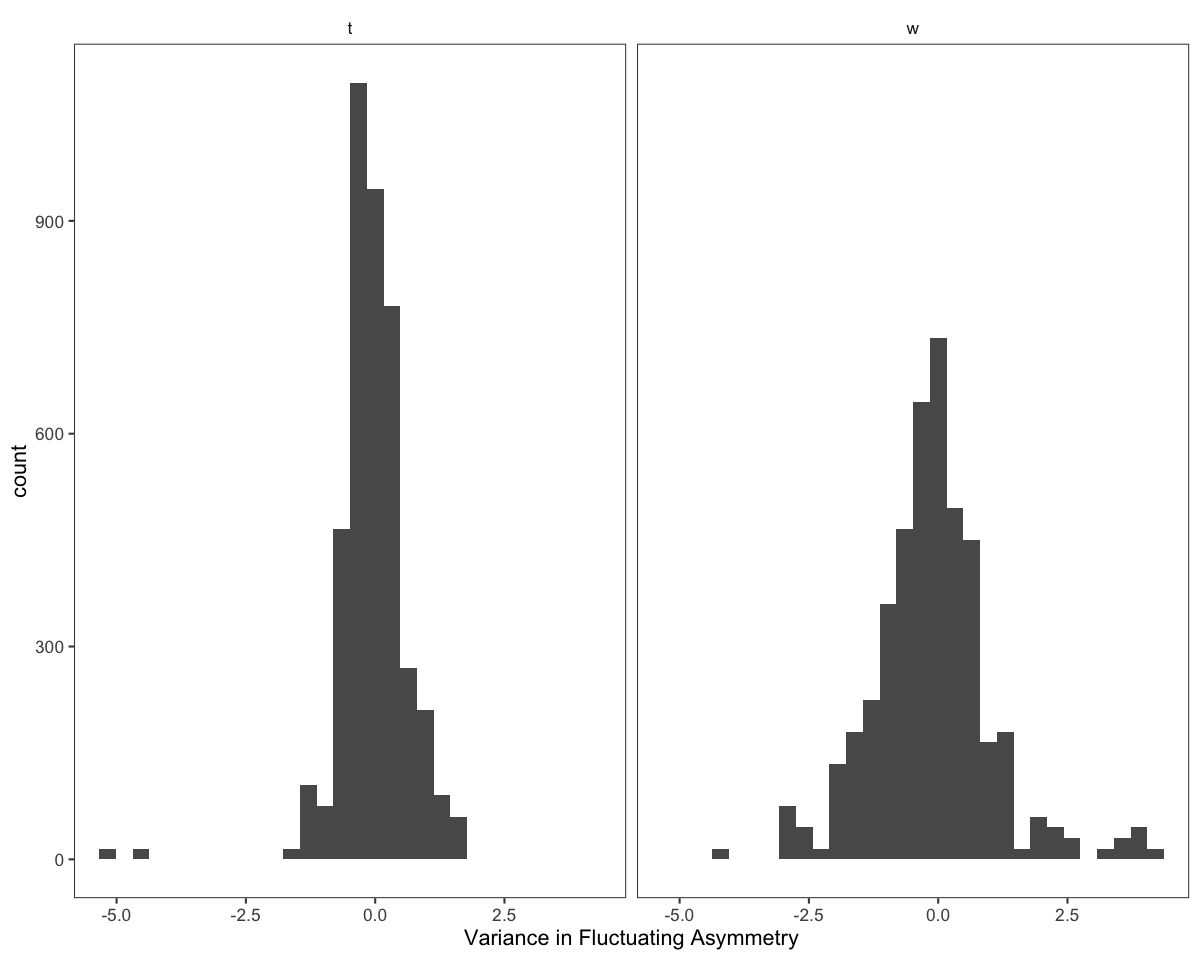

Warning message:
“Removed 30 rows containing non-finite values (stat_ydensity).”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 2 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 2 rows containing missing values”
Warning message:
“Removed 2 rows containing missing values (geom_point).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”
Warning message:
“Removed 2 rows containing non-finite values (stat_density).”


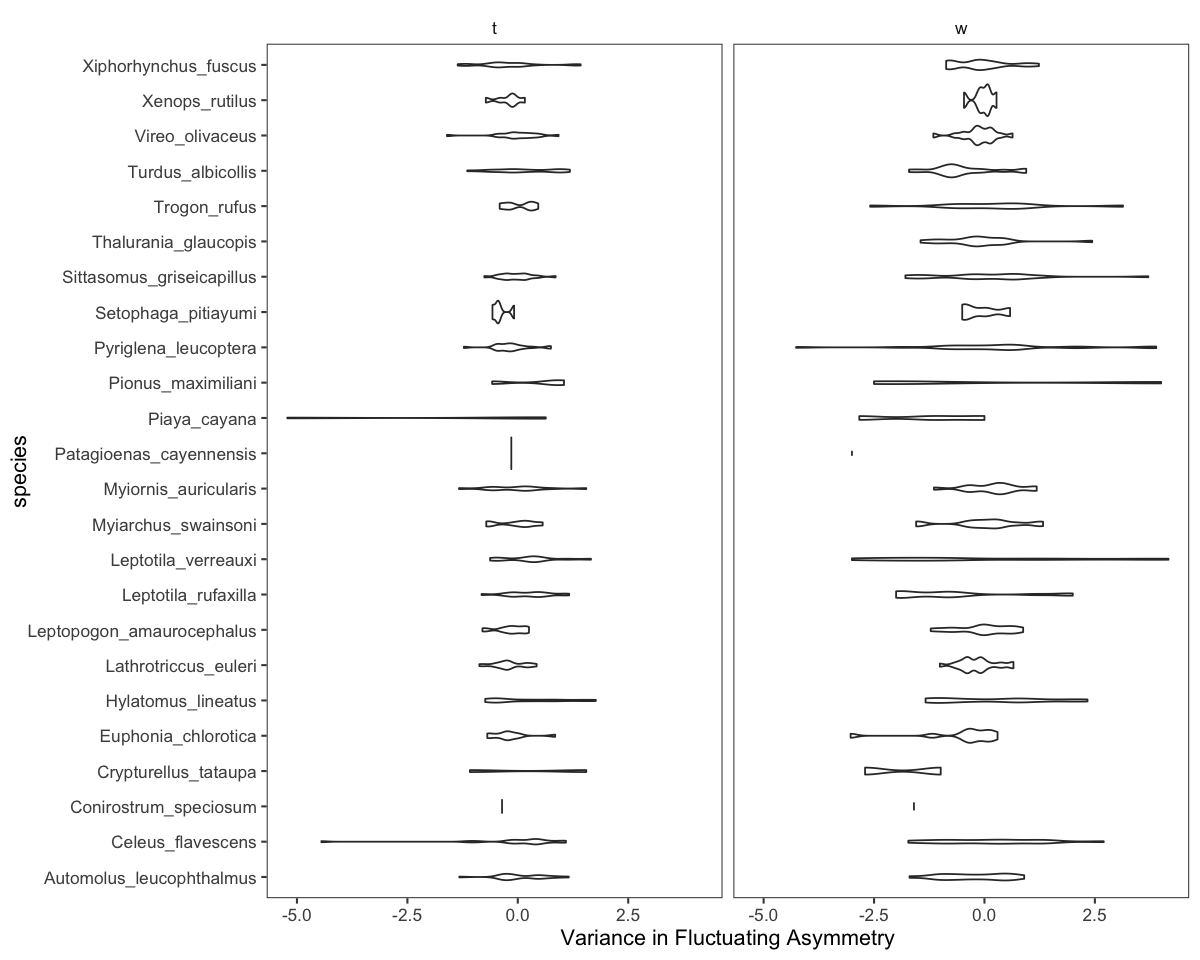

Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 2 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 2 rows containing missing values”
Warning message:
“Removed 2 rows containing missing values (geom_point).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”
Warning message:
“Removed 2 rows containing non-finite values (stat_density).”


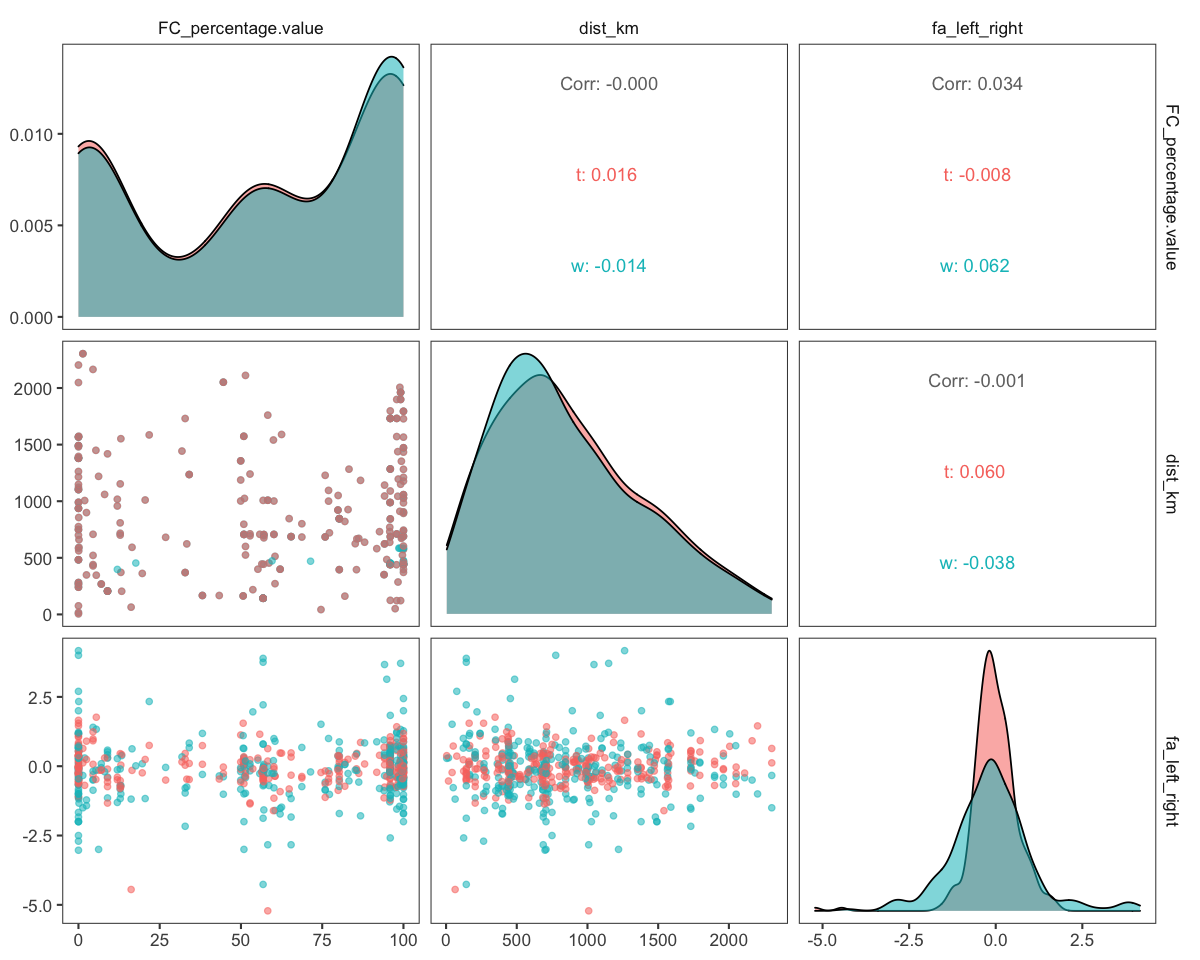

In [203]:
options(repr.plot.width=10, repr.plot.height=8)

plot_hist <- ggplot(FA_FC_data, aes(x=fa_left_right)) + 
              geom_histogram(bins = 30)+
              labs(x= "Variance in Fluctuating Asymmetry")+
              facet_wrap(~type) +
                theme_article(base_size = 13)
plot_hist
ggsave("../2.results/plots/FA_left_right_hist.png", plot_hist, width = 7, height=7, units="in")

##
plot_violin <- ggplot(FA_FC_data, aes(x=fa_left_right, y=species)) + 
                geom_violin()+
                labs(x= "Variance in Fluctuating Asymmetry")+
                facet_wrap(~type) +
                theme_article(base_size = 13)
plot_violin
ggsave("../2.results/plots/FA_left_right_per_species.png", plot_violin, width = 7, height=8, units="in")

##
plot_pairs <- FA_FC_data %>%
                filter(FC_buffer == 600) %>%
                ggpairs(columns = c('FC_percentage.value', 'dist_km', 'fa_left_right'), 
                    ggplot2::aes(colour=type, alpha=0.8))+
                    theme_article(base_size = 13)
plot_pairs
ggsave("../2.results/plots/Fa_FC_600_dist.png", plot_pairs, width = 7, height=7, units="in")
 

I use the variance in the signed difference between L and R as a measure of FA. This is because it is suggested in this [paper](https://resjournals.onlinelibrary.wiley.com/doi/epdf/10.1046/j.1365-2311.2000.00204.x). I dont explicitly correct for size of the trait because according to this [other paper](http://www.biology.ualberta.ca/palmer.hp/asym/FA/Primer.pdf), page 25, '10.2 Test for size dependence of FA between samples' there seems to be no pattern in my data to justify the scaling ("Arbitrary correction for presumed size-dependence can lead to spurious differences among samples.

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 2 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 2 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”


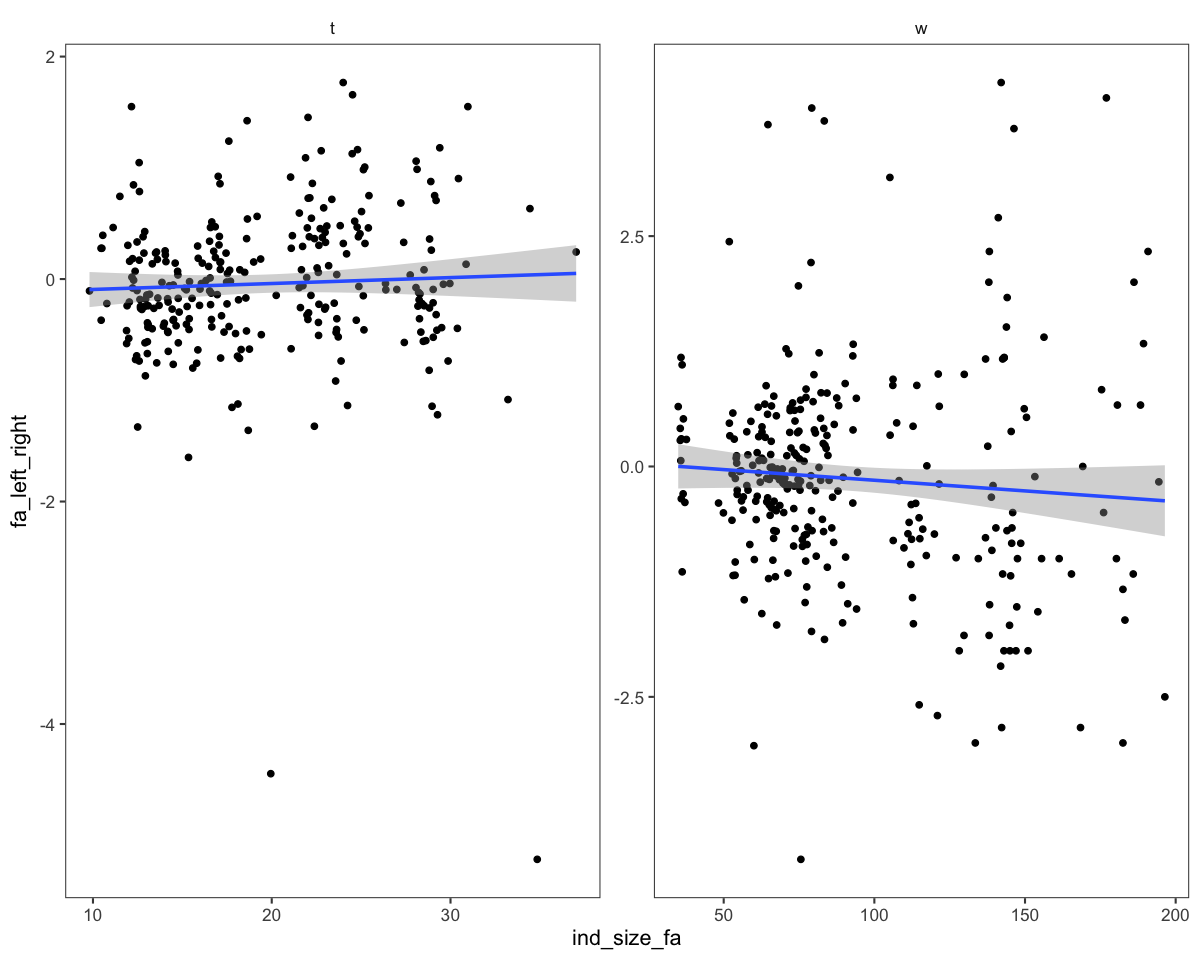

In [202]:
# regression of (R-L) against measure of body size

plot_FA_ind_size <- FA_FC_data %>%
        mutate(ind_size_fa = (mean_l + mean_r)/2)%>%
        filter(FC_buffer == 600) %>%
        ggplot(aes(x=ind_size_fa, y=fa_left_right))+
               geom_point()+
               geom_smooth(method = "lm")+
                facet_wrap(~type, scales = "free")+
                theme_article(base_size = 13)

plot_FA_ind_size
ggsave("../2.results/plots/Fa_vs_ind_size.png",plot_FA_ind_size, width = 7, height=7, units="in")
 


## Model Fitting

Fit a model predicting variance as a function of distance to range edge plus a random effect of species on distance. I use proportion of forest cover and log of distance to range edge to avoid problems with model convergence due to variable values being too different in magnitude. 

In [161]:
FA_FC_data <- FA_FC_data %>%
    mutate(FC_proportion = FC_percentage.value/100, log_dist = log(dist_km)) %>%  #add columns
    filter(!is.na(FC_buffer))

FA_FC_data %>%
        write_csv("../FA_FC_final.csv")

In [18]:
FA_FC_data %>%
dplyr::filter(FC_buffer == 600)%>%
nrow()

FA_FC_data %>%
distinct(species)%>%
nrow()

FA_FC_data %>%
distinct(location)%>%
nrow()

FA_FC_data %>%
pull(date_collected)%>%
range()

[1] 574

[1] 24

[1] 196

[1] 1926 2017

### Bayesian models for FA (wing and tarsus)

Formula used is ```brm(bf(fa_left_right ~ 0, sigma ~ FC_proportion * log(dist_km) + (log(dist_km)| species))```.

The first term is relative to the mean, that I am not modelling because it doesn't make sense. As there is no directionality in the data, there are no true differences between left and right, therefore the mean is zero. So I decided to model the variance, which is the second term of the formula (sigma).

The second term models the variance of FA as a function of forest cover proportion and log of distance to the range edge as interacting fixed/constant effects and a random/varying effect consistent of a random/varying intercept for species and random/varying slopes for distance.

Using brms default priors  = weakly informative

I ran a model for **each of the buffer radius** (100 to 1500 in 100m increments) and type of trait (tarsus or wing) and saved them as a list of models.

I have commented out the model below because it takes hours (~5 hours) to run, the output is save as ```models``` in the results folder (```./2.results/```).

In [162]:
# #fit models

# set.seed(1)

# models <- list()

# #get buffers and trait vectors
# buffers <- unique(FA_FC_data$FC_buffer)
# types <- unique(FA_FC_data$type)

# #loop over both and fit all models
# k = 1
# for(i in buffers){
#     for(j in types){
#         print(paste(i, j, k / (length(buffers) * length(types))))
#        models[[paste(i,j, sep = " ", " ")]] <- FA_FC_data %>%
#             filter(FC_buffer == i, type == j) %>%
#             brm(bf(fa_left_right ~ 0, sigma ~ FC_proportion * log(dist_km) + (log(dist_km) | species)),
#                 data = .,
#                 family = gaussian,
#                 cores = 4, chains = 4, iter = 10000, 
#                 control=list(adapt_delta = 0.99),
#                 silent = 2)
#         k <- k+1
                
#     }
# }

# #save output
# save(models, file =  "./2.results/bayesmodels_buffers.RData")

#### Choosing forest cover radius

Load FA bayes models and check global environment.

In [159]:
load(file = "..//2.data_cleaned/bayesmodels_buffers.RData")
ls()

[1] "bay_mod_t"         "bay_mod_t_FC"      "bay_mod_w"        
 [4] "bay_mod_w_FC"      "density_FC"        "dist"             
 [7] "extract_coefs"     "FA"                "FA_data"          
[10] "FA_FC_data"        "FA_FC_mod"         "FA_FC_mod_buffers"
[13] "FA_FC_mod_radius"  "FC"                "models"           
[16] "plot_FA_ind_size"  "plot_hist"         "plot_pairs"       
[19] "plot_violin"       "variance_FC"

#### Plot just density and variance of forest cover per radius

Plot figures to decide which forest cover buffer radius to use for the final analysis. This is the density of forest cover per radius.

pdf 
  2

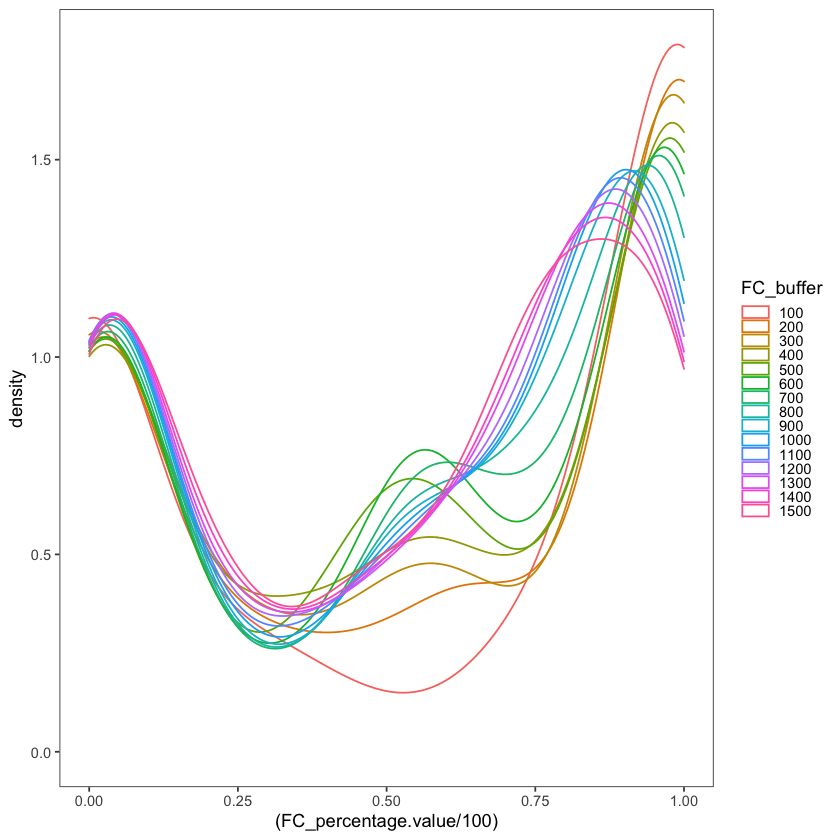

In [163]:
options(repr.plot.width=7, repr.plot.height=7)

density_FC <- FA_FC_data %>%
        mutate(FC_buffer = as.factor(FC_buffer)) %>%
           ggplot(aes(x=(FC_percentage.value/100), color=FC_buffer))+
            geom_density() +
            theme_article()

density_FC
png(file="../2.results/plots/FC_by_radius_density.png", width=7, height = 10, units="in", res = 1200)
plot(density_FC)
dev.off()

This is the variance in proportion of forest cover plot per radius.

pdf 
  2

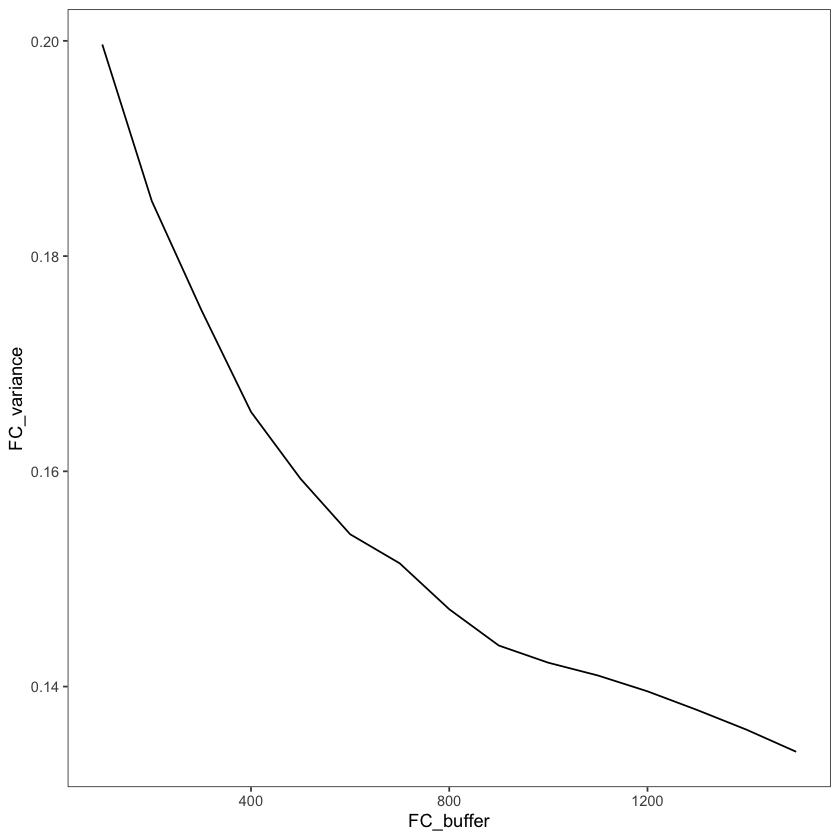

In [164]:
variance_FC = FA_FC_data %>%
    mutate(FC_proportion = FC_percentage.value/100)%>%
    group_by(FC_buffer) %>%
    summarise(FC_variance = var(FC_proportion))%>%
       ggplot(aes(x=FC_buffer, y=FC_variance))+
        geom_line()+
        theme_article()

variance_FC
png(file="../2.results/plots/FC_variance_by_radius.png", width=7, height = 10, units="in", res = 1200)
plot(variance_FC)
dev.off()

#### Plot model coefs for all buffer radius

The function ```get_variables()``` returns the names of variables that can be extracted from the bayes models to be passed into other functions.  

In [165]:
#get_variables(models[[1]])

Previously, I ran a model for **each of the buffer radius** (100 to 1500 in 100m increments) and type of trait (tarsus or wing) and saved them as a list of models.

In [166]:
summary(models)

         Length Class   Mode
100 w    21     brmsfit list
100 t    21     brmsfit list
200 w    21     brmsfit list
200 t    21     brmsfit list
300 w    21     brmsfit list
300 t    21     brmsfit list
400 w    21     brmsfit list
400 t    21     brmsfit list
500 w    21     brmsfit list
500 t    21     brmsfit list
600 w    21     brmsfit list
600 t    21     brmsfit list
700 w    21     brmsfit list
700 t    21     brmsfit list
800 w    21     brmsfit list
800 t    21     brmsfit list
900 w    21     brmsfit list
900 t    21     brmsfit list
1000 w   21     brmsfit list
1000 t   21     brmsfit list
1100 w   21     brmsfit list
1100 t   21     brmsfit list
1200 w   21     brmsfit list
1200 t   21     brmsfit list
1300 w   21     brmsfit list
1300 t   21     brmsfit list
1400 w   21     brmsfit list
1400 t   21     brmsfit list
1500 w   21     brmsfit list
1500 t   21     brmsfit list

Here I write a function to extract the coefficients of each model and get their summary statistics. The function ```gather_draws``` allows me to choose which coefficients to extract in a long-format data frame (for wide-format use ```spread_draws```). Then ```summarise_draws``` calculates all summary statistics for the coefficients selected in the step above. I chose to write a function instead of only a `for loop` because I will have to do the same for the FGB models. 

In [156]:
extract_coefs = function(models_list){
    
    mean_coefs = list() # create empty list to store values
    
    for(model in 1:length(models_list)){
        
        mean_coefs[[model]] = models[[model]]%>% # store values in the list created above
            gather_draws(b_sigma_Intercept,b_sigma_FC_proportion, # choose coeffs
                         b_sigma_logdist_km,`b_sigma_FC_proportion:logdist_km`)%>%
            summarise_draws(.) %>% # calculate summary stats
            mutate(mod = names(models_list)[model], .before=".variable") # create new column 
            # with models names so I can id them later
    }
   
    return(bind_rows(mean_coefs)) # bind lists created into a dataframe and return it
    
}

Now use the functions to extract the coefficients.

In [119]:
FA_FC_mod = extract_coefs(models)

Here I had to do some data wrangling to facilitate plotting. First I separate the column ```mod``` into two new columns ```buffer``` and ```type```. Then transform ```buffer``` into numeric. Rename ```t``` and ```w``` into *tarsus* and *wing* respectively. Also rename all the coefs variable names to something less "model-like". 
The warning is not important, it appears because the function ```separate``` expects to find only two pieces, but there is an extra space after the type. 

In [188]:
FA_FC_mod_buffers = FA_FC_mod %>%
                        separate(mod, c("buffer", "type"))%>%
                        mutate(buffer = as.numeric(buffer))%>%
                        mutate(type = case_when(type == "t" ~ "Tarsus",
                                                  type == "w" ~ "Wing"))%>%
                        mutate(.variable = case_when(.variable == "b_sigma_FC_proportion"~ "Forest cover proportion",
                                                     .variable == "b_sigma_FC_proportion:logdist_km" ~ "Interaction",
                                                     .variable == "b_sigma_Intercept" ~ "Intercept",
                                                     .variable == "b_sigma_logdist_km" ~ "Distance to edge log (km)")) 

Warning message:
“Expected 2 pieces. Additional pieces discarded in 120 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”


In [189]:
head(FA_FC_mod_buffers, n= 10)

buffer,type,.variable,variable,mean,median,sd,mad,q5,q95,rhat,ess_bulk,ess_tail
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
100,Wing,Forest cover proportion,.value,-0.17141569,-0.16874800,1.0981498,1.0997351,-1.96034612,1.61723762,1.000075,6594.160770,11698.415
100,Wing,Interaction,.value,0.04156022,0.04087587,0.1647003,0.1655382,-0.22783495,0.31139848,1.000107,6234.035587,11392.179
100,Wing,Intercept,.value,1.30900634,1.28331582,1.0006527,0.9784249,-0.28233673,2.99854758,1.000150,10718.595402,12276.172
100,Wing,Distance to edge log (km),.value,-0.20743385,-0.20331613,0.1520843,0.1482287,-0.46623764,0.03298668,1.000180,10176.929043,10850.830
100,Tarsus,Forest cover proportion,.value,-1.72044194,-1.75857542,0.9953799,0.9724260,-3.29162777,-0.02578569,1.000176,8326.547912,9365.407
100,Tarsus,Interaction,.value,0.22130684,0.22628109,0.1481941,0.1445003,-0.03033568,0.45634072,1.000122,8652.361720,9893.415
100,Tarsus,Intercept,.value,0.69283671,0.74836932,0.8511712,0.8082166,-0.80796312,1.98034436,1.000140,6940.997773,8660.628
100,Tarsus,Distance to edge log (km),.value,-0.15981129,-0.16740787,0.1261640,0.1206519,-0.35325188,0.06014871,1.000147,7195.351662,9115.167
200,Wing,Forest cover proportion,.value,-0.34132551,-0.27998805,0.9869517,0.7304183,-2.05711767,1.35273395,1.580125,6288.377851,NA


Now, finally plot it!

I discarded models with rhats greater than 1.01 as they do not have reliable estimates. I used ```facet_grid``` to plot it all at once. 

pdf 
  2

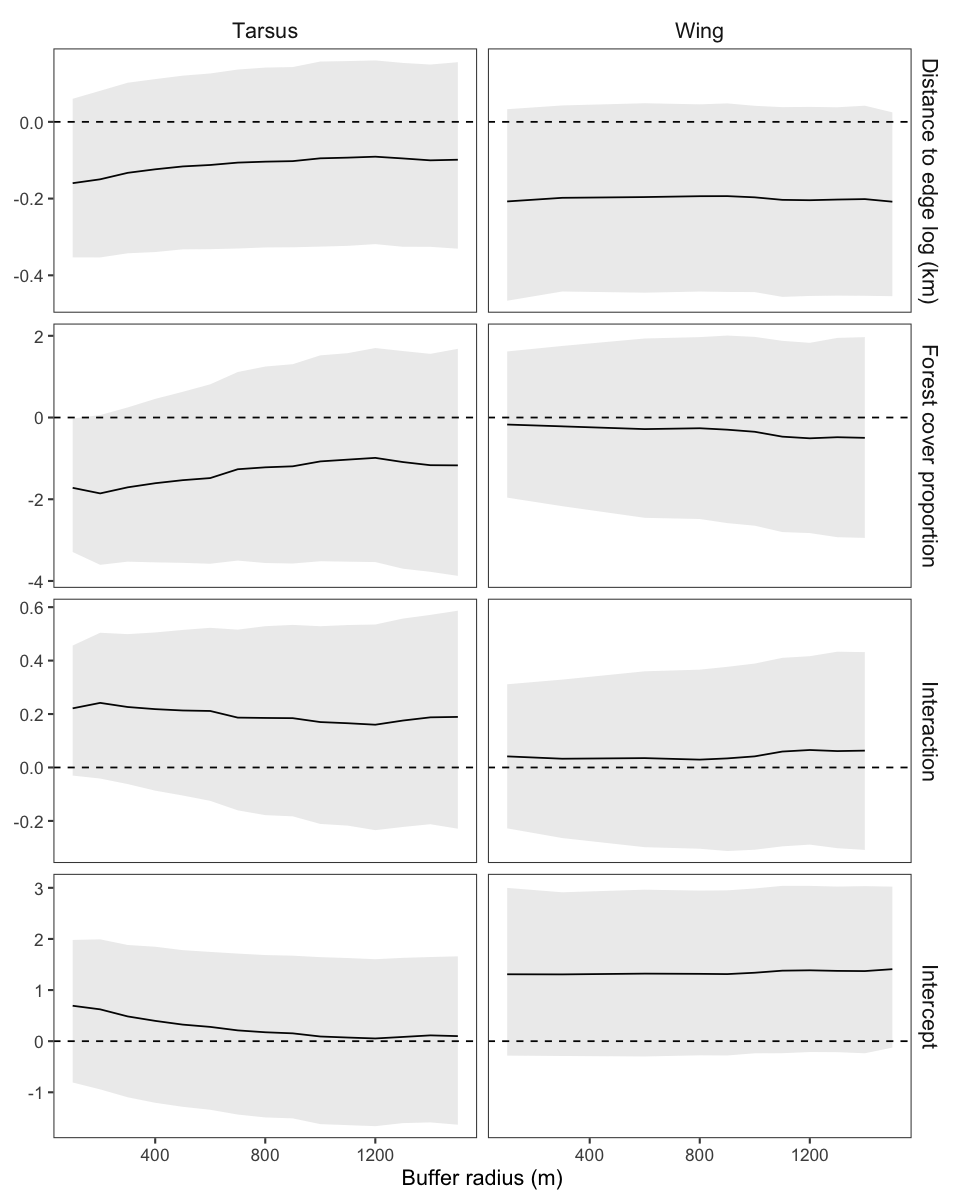

In [190]:
options(repr.plot.width=8, repr.plot.height=10)

FC_mod_coefs = FA_FC_mod_buffers %>%
    filter(rhat < 1.01)%>%
       ggplot(aes(x=buffer, y=mean))+
        geom_line()+
        geom_hline(yintercept = 0, linetype = "dashed")+
        geom_ribbon(aes(ymin=q5, ymax=q95), alpha = 0.1)+
        labs(x = "Buffer radius (m)", y=NULL)+
        facet_grid(.variable~type, scales="free")+
        theme_article(base_size=13) +
        theme(strip.text = element_text(size = 13))

FC_mod_coefs
png(file="../2.results/plots/FC_mod_coefs_all.png", width=7, height = 10, units="in", res = 1200)
plot(FC_mod_coefs)
dev.off()

The figure shows that FA is not sensitive to the different buffer radius, as they are pretty much straight lines. Therefore I will use the 600 meters radius for the following reasons: 1) These species have relatively restricted movement (approx. 150m - [ref.](https://www.sciencedirect.com/science/article/pii/S253006441830066X)); 2) This scale has been used by other studies conducted with these species( [ref.](https://www.science.org/doi/10.1126/science.1255768), [ref.](https://bioone.org/journals/the-wilson-journal-of-ornithology/volume-119/issue-2/05-133.1/EDGE-RESPONSES-OF-TROPICAL-AND-TEMPERATE-BIRDS/10.1676/05-133.1.short), [ref.](https://www.nature.com/articles/s41559-019-0889-z#ref-CR18) and my first chapter); 3) All models converged at this buffers radius. 

Below I assign the respective models for wing and tarsus at 600m buffer radius from the list of models generated previously.  

In [170]:
bay_mod_w = models[[11]]
bay_mod_t = models[[12]]

Let's look at the summary of the wing model.

In [171]:
summary(bay_mod_w)

Warning message:
“There were 1 divergent transitions after warmup. Increasing adapt_delta above 0.99 may help. See http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”


 Family: gaussian 
  Links: mu = identity; sigma = log 
Formula: fa_left_right ~ 0 
         sigma ~ FC_proportion * log(dist_km) + (log(dist_km) | species)
   Data: . (Number of observations: 296) 
  Draws: 4 chains, each with iter = 10000; warmup = 5000; thin = 1;
         total post-warmup draws = 20000

Group-Level Effects: 
~species (Number of levels: 24) 
                                      Estimate Est.Error l-95% CI u-95% CI Rhat
sd(sigma_Intercept)                       1.53      0.99     0.17     3.75 1.00
sd(sigma_logdist_km)                      0.22      0.16     0.01     0.58 1.00
cor(sigma_Intercept,sigma_logdist_km)    -0.70      0.46    -1.00     0.72 1.00
                                      Bulk_ESS Tail_ESS
sd(sigma_Intercept)                       1382     3782
sd(sigma_logdist_km)                       934     3386
cor(sigma_Intercept,sigma_logdist_km)     1311     4216

Population-Level Effects: 
                               Estimate Est.Error l-95% CI u-95%

It is okay to have a few divergent transitions as long as the Rhat is 1.00

Looking at the **population level effects**, the results suggest that variance in fluctuating asymmetry decreases with an increase in proportion of forest cover, as well as with an increase in distance to the edge. That is, smaller variance with increase of forest cover and smaller variance with increase in distance to the range edge. The interaction, however, is positive which indicates that when FC and dist increase, FA decreases. FA decreases at a faster rate if both FC and dist increase, and at a slower rate if FC stays constant and dist increases, and at an even slower rate if dist stays constant and FC increases.

However, the estimated errors around the estimates of FA variance are quite high and all the credible intervals span zero, therefore there is a great chance that none of these are actually correlated or have any relationship. 

The **group-level effects** revels a negative correlation between the intercept and slopes for species, meaning that species with large "baseline level of variability" (i.e. with a large variance in FA value) tend to be pronounced with less variability by increasing distance to the range edge. 

In [179]:
# Roughtly calculated FA for different values 
# of FC and dist to understand the interaction. 
# I ignored the error terms...

FC_n = 4
dist_n = 2
FA_n = 1.32 + (-0.28*FC_n) + (-0.2*dist_n)+(0.04*FC_n*dist_n)
print(FA_n)

[1] 0.12


Although this is not a frequentist approach, brms allows me perform hypothesis testing using the ```hypothesis``` function. This function allows me to ask what is the evidence ratio that *a* is greater or smaller than *b*. 

In this case below, I test if the variance of FA decreases with increasing distance to the edge. For FA to decrease, dist has to have a negative coef, that's why the test is for ```dist < 0```. 

Hypothesis Tests for class b:
              Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio
1 (sigma_logdist_km) < 0     -0.2      0.15    -0.45     0.05       9.93
  Post.Prob Star
1      0.91     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

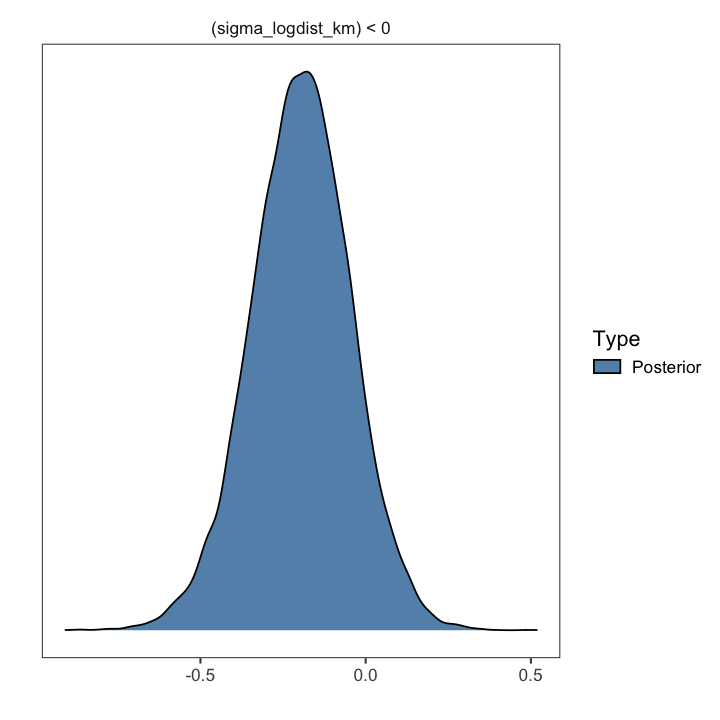

In [196]:
options(repr.plot.width=6, repr.plot.height=6)

hypothesis(bay_mod_w, "sigma_logdist_km < 0")
plot(hypothesis(bay_mod_w, "sigma_logdist_km < 0"), theme = theme_article(base_size=13))

Looking at the evidence ratio and the posterior probability, 
I can assume that there is a 91% chance that the variance in FA will be 9.93 times smaller with increasing distance to the edge. 

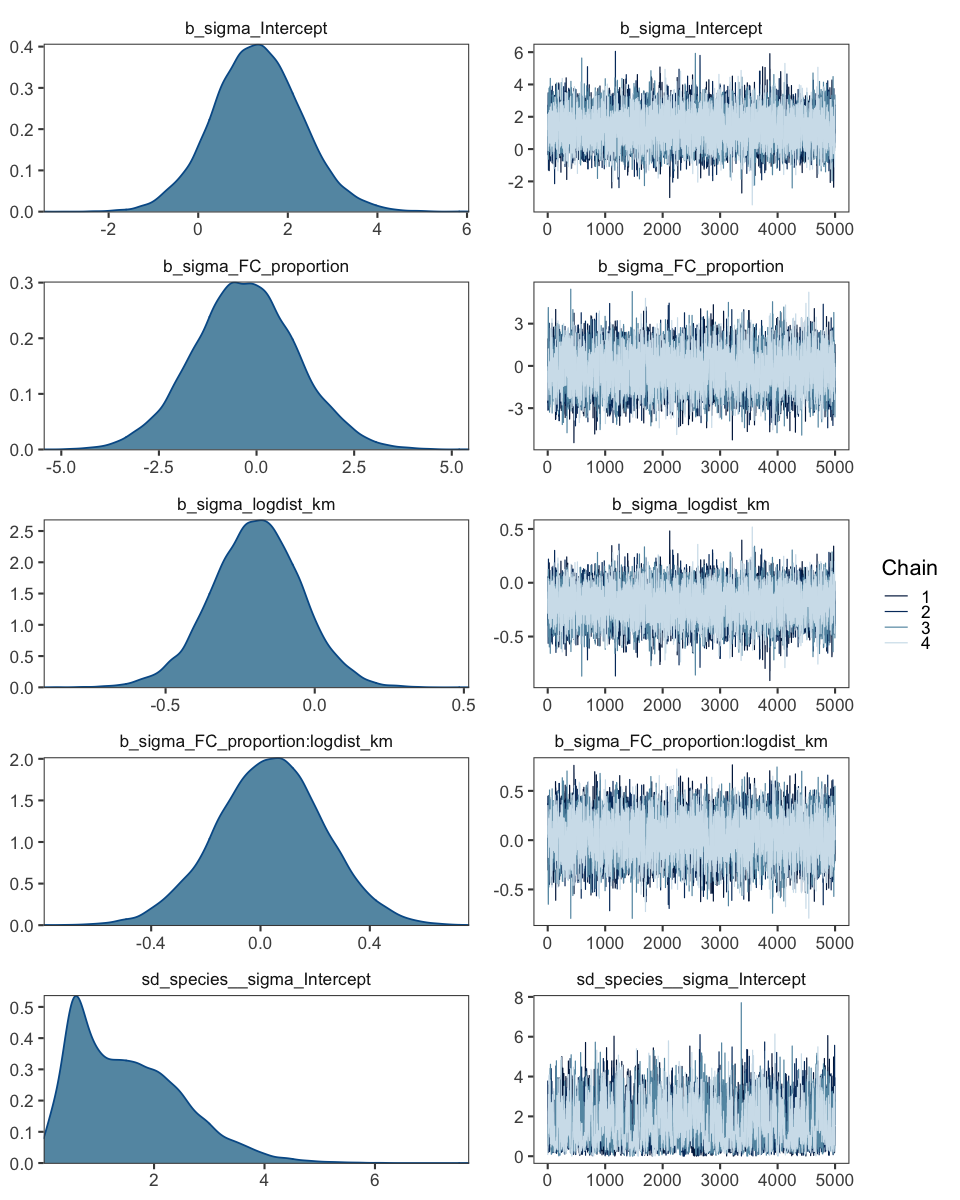

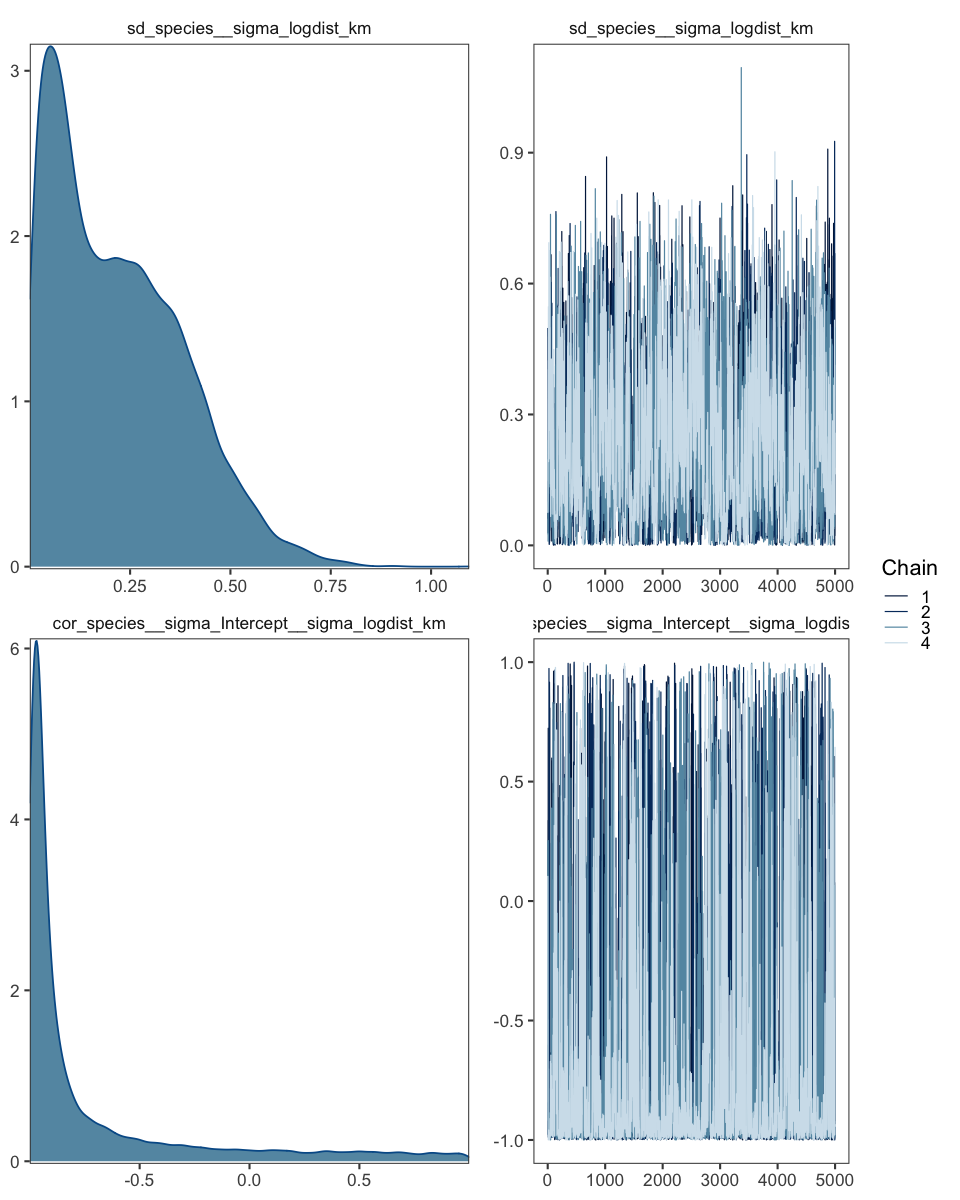

In [193]:
options(repr.plot.width=8, repr.plot.height=10)
plot(bay_mod_w, theme = theme_article(base_size = 13))

#png(file="../2.results/plots/bayes_w_coefs_chains.png", width=7, height = 10, units="in", res = 1200)
#plot(bay_mod_w)
#dev.off()


Warning message:
“The following arguments were unrecognized and ignored: theme”


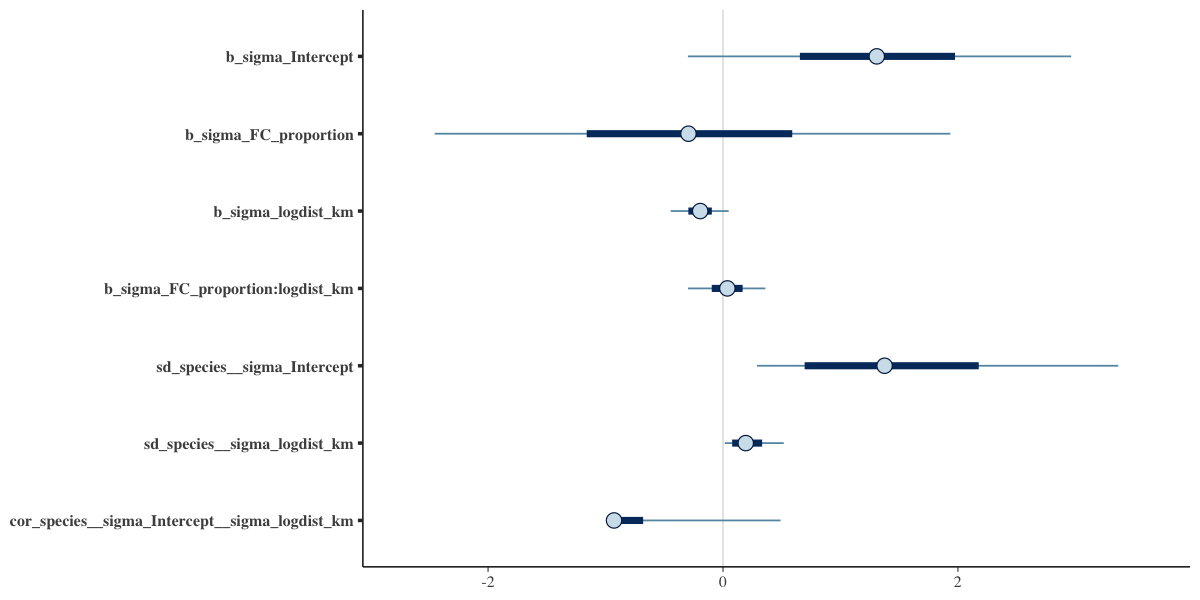

In [197]:
options(repr.plot.width=10, repr.plot.height=5)
mcmc_plot(bay_mod_w, theme = theme_article(base_size = 13))

png(file="../2.results/plots/bayes_w_coef.png", width=7, height = 10, units="in", res = 1200)
mcmc_plot(bay_mod_w, theme = theme_article(base_size = 13))
dev.off()


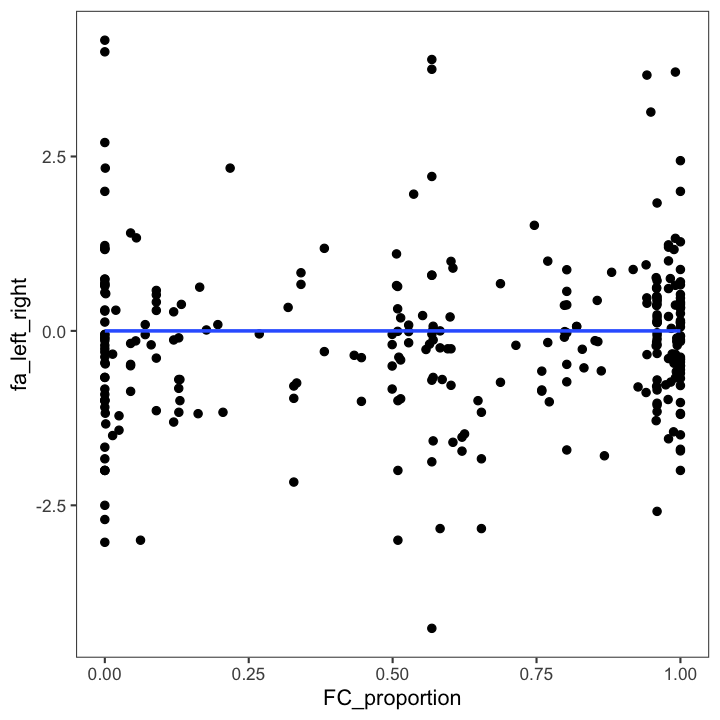

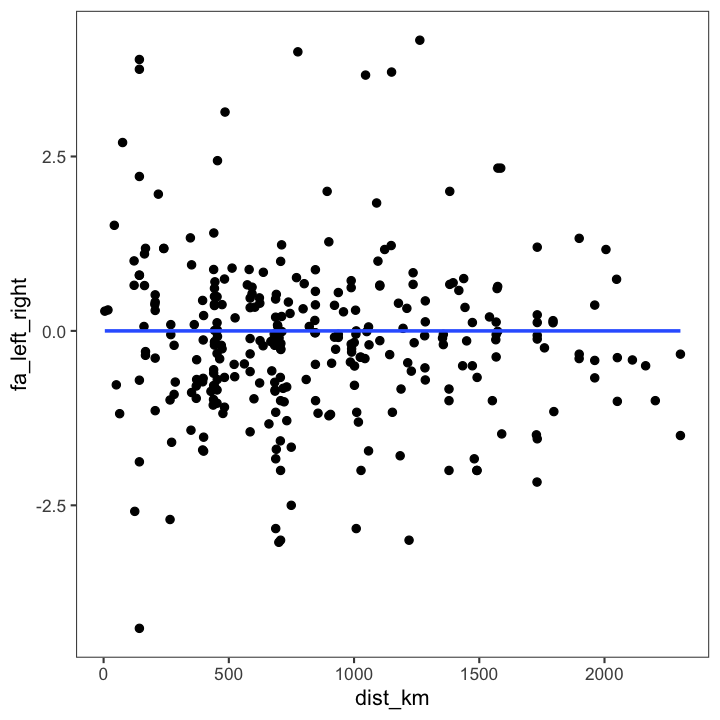

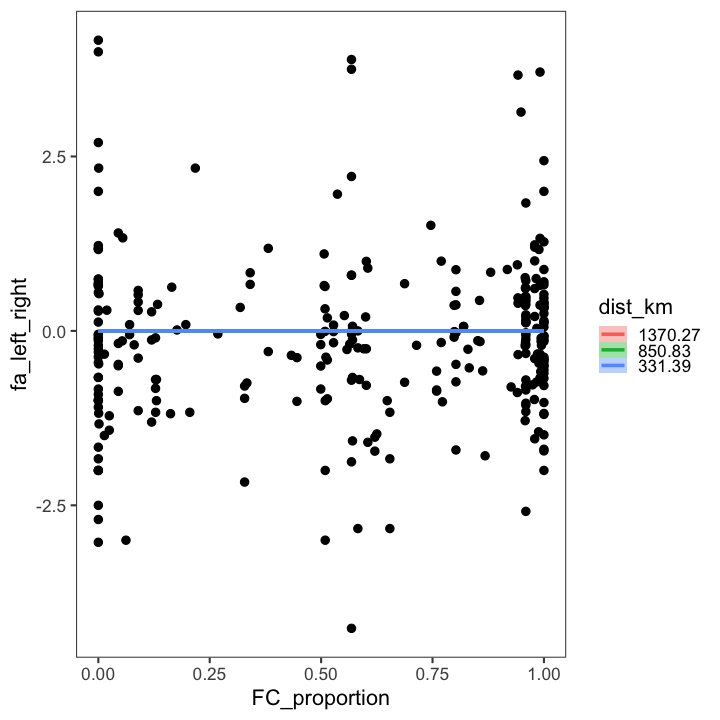

In [199]:
options(repr.plot.width=6, repr.plot.height=6)

plot(conditional_effects(bay_mod_w), points = TRUE, theme = theme_article(base_size = 13))

#png(file="../2.results/plots/bayes_w_cond_effects.png", width=7, height = 10, units="in", res = 1200)
#plot(conditional_effects(bay_mod_w), points = TRUE)
#dev.off()


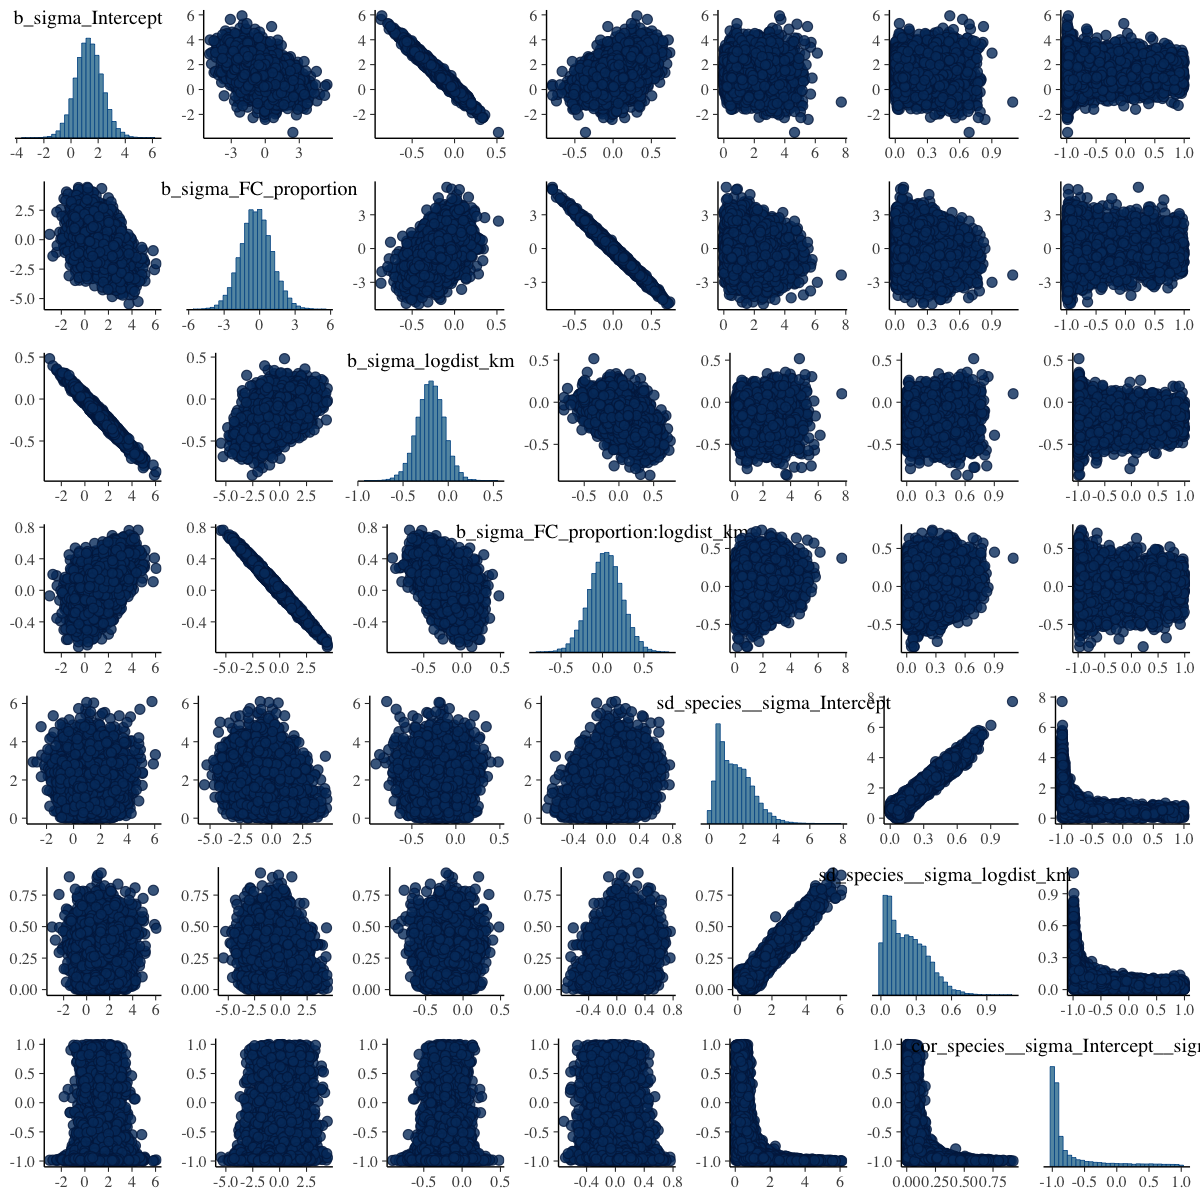

In [200]:
options(repr.plot.width=10, repr.plot.height=10)
pairs(bay_mod_w)

In [ ]:
# for model comparisons, use functions:

# LOO(model1, model2,...modeln) - Bayesian leave-one-out-cross-validation (LOO-CV,436
# Vehtari, Gelman, & Gabry, 2017)
# choose the lower LOOIC

# WAIC(model1, model2,...modeln) - Watanabe Akaike Information 
# Criterion (WAIC, Watanabe, 2010)